In [3]:
import gym
import numpy as np
from agents.dqn import DQN 
import matplotlib.pyplot as plt
%matplotlib inline
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()
is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

Episode done in 200 steps.


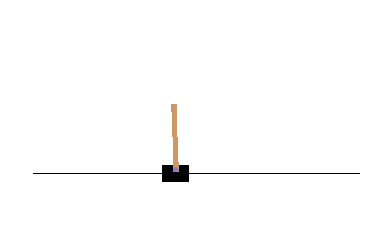

In [5]:
env = gym.make('CartPole-v0')
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
agent = DQN(num_states, num_actions, epsilon=0.0)
agent.load("./models/cartpole.h5")
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for step in range(1000):
    action = agent.act(np.reshape(state, [1, agent.state_size]))
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        print('Episode done in {} steps.'.format(step+1))
        break
env.close()